In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('book', quiet=True)
from nltk.book import *
from nltk.tokenize import RegexpTokenizer, WordPunctTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
data = nltk.corpus.gutenberg.raw('austen-emma.txt')
data = data[:1000]

In [6]:
# 단어 단위 토크나이징
tokenizer = WordPunctTokenizer()    # 띄어쓰기 단위 토크나이징
data = tokenizer.tokenize(data)
data

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 '

In [8]:
# 불용어 제거
data = [each_word for each_word in data if(each_word not in stopwords.words())]

# 단어별 언급 빈도 확인
data_cnt = dict(Counter(data))
# data_cnt = Counter(data)
# data_cnt = dict(data_cnt)
data_cnt

{'[': 1,
 'Emma': 3,
 'Jane': 1,
 'Austen': 1,
 '1816': 1,
 ']': 1,
 'VOLUME': 1,
 'I': 2,
 'CHAPTER': 1,
 'Woodhouse': 2,
 ',': 13,
 'handsome': 1,
 'clever': 1,
 'rich': 1,
 'comfortable': 1,
 'home': 1,
 'happy': 1,
 'disposition': 1,
 'unite': 1,
 'blessings': 1,
 'existence': 1,
 ';': 3,
 'lived': 1,
 'twenty': 1,
 '-': 1,
 'years': 2,
 'world': 1,
 'distress': 1,
 'vex': 1,
 '.': 6,
 'She': 1,
 'youngest': 1,
 'daughters': 2,
 'affectionate': 1,
 'indulgent': 1,
 'father': 1,
 'consequence': 1,
 'sister': 1,
 "'": 2,
 'marriage': 1,
 'mistress': 1,
 'house': 1,
 'early': 1,
 'period': 1,
 'Her': 1,
 'mother': 2,
 'died': 1,
 'long': 1,
 'ago': 1,
 'indistinct': 1,
 'remembrance': 1,
 'caresses': 1,
 'place': 1,
 'supplied': 1,
 'excellent': 1,
 'woman': 1,
 'governess': 3,
 'fallen': 1,
 'short': 1,
 'affection': 1,
 'Sixteen': 1,
 'Miss': 2,
 'Taylor': 2,
 'Mr': 1,
 'family': 1,
 'friend': 1,
 'fond': 1,
 'particularly': 1,
 'Between': 1,
 '_them_': 1,
 'intimacy': 1,
 'sisters'

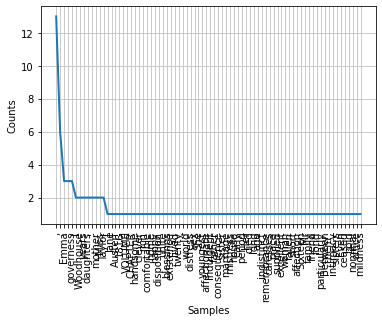

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
# 단어별 언급 빈도 그래프
data_graph = nltk.Text(data, name='word count')
data_graph.plot()

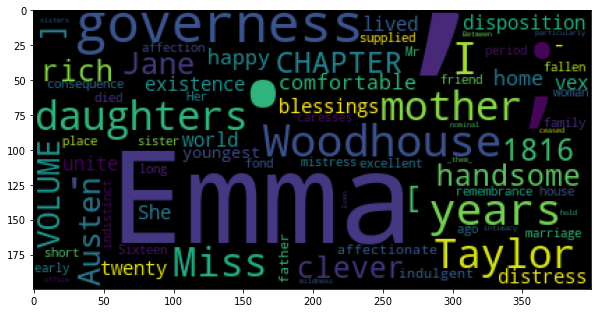

In [12]:
wordcloud = WordCloud().generate_from_frequencies(data_cnt)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()